### realized volatility 측정

5 days


In [72]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [73]:
AAPL_data = pd.read_csv('data/AAPL.csv')

In [74]:
AAPL_data['log_price_return'] = np.log(AAPL_data['Adj Close']).diff(1)
AAPL_data['squared_log_price_return'] = AAPL_data['log_price_return'] ** 2

<Figure size 1000x600 with 0 Axes>

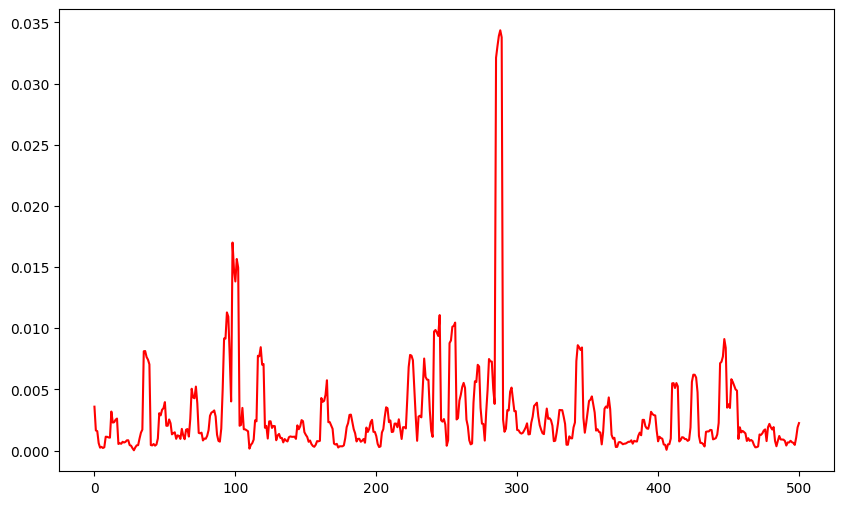

In [75]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
#논문에서 명시된 realized volatility 

volatility = AAPL_data['squared_log_price_return'].dropna().rolling(window=5).sum() / 5.0

plt.figure(figsize=(10,6))
#volatility 정규화
scaler = MinMaxScaler()
normalzied_volatility = scaler.fit_transform(volatility.values.reshape(-1,1))
# normalized_squared_return = scaler.fit_transform(AAPL_data['squared_log_price_return'].values.reshape(-1,1))
plt.plot(normalzied_volatility[2998:], color='red')
# plt.plot(normalized_squared_return[3000:], color= 'red')
# plt.plot(volatility[3000:])

In [67]:
volatility

1            NaN
2            NaN
3            NaN
4       0.003661
5       0.002172
          ...   
3495    0.000046
3496    0.000056
3497    0.000108
3498    0.000188
3499    0.000254
Name: squared_log_price_return, Length: 3499, dtype: float64

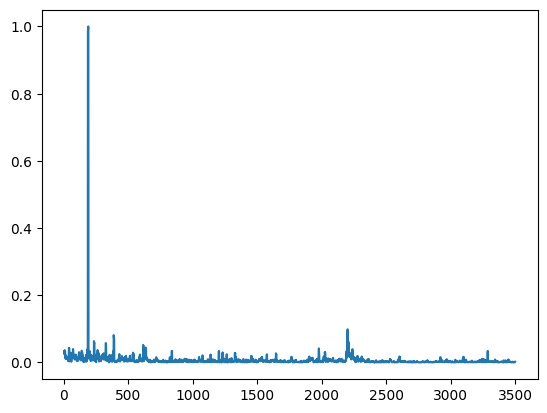

In [78]:
plt.plot(normalzied_volatility)

array([[       nan],
       [       nan],
       [       nan],
       ...,
       [0.00106366],
       [0.00189808],
       [0.00225065]])